In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib

In [14]:
df = pd.read_csv('processed_data.csv')
df.head()

C:\Users\Dhanush Jain\miniconda3\envs\mlcricket\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras_total,run_total,wickets,overs_left,run_rate,striker_score,non_striker_score,striker_rate,non_striker_rate,final_score
0,1310981.0,2022,5/24/2022,"Southend Club Cricket Stadium, Karachi",1.0,0.1,Sri Lanka,Pakistan,GWHM Perera,AC Jayangani,...,0.0,0.0,0,19.5,0.0,0.0,0.0,0.000000,0.0,106.0
1,1310981.0,2022,5/24/2022,"Southend Club Cricket Stadium, Karachi",1.0,0.2,Sri Lanka,Pakistan,GWHM Perera,AC Jayangani,...,0.0,4.0,0,19.4,12.0,4.0,0.0,200.000000,0.0,106.0
2,1310981.0,2022,5/24/2022,"Southend Club Cricket Stadium, Karachi",1.0,0.3,Sri Lanka,Pakistan,GWHM Perera,AC Jayangani,...,0.0,4.0,0,19.3,8.0,4.0,0.0,133.333333,0.0,106.0
3,1310981.0,2022,5/24/2022,"Southend Club Cricket Stadium, Karachi",1.0,0.4,Sri Lanka,Pakistan,GWHM Perera,AC Jayangani,...,0.0,4.0,1,19.2,6.0,0.0,0.0,0.000000,0.0,106.0
4,1310981.0,2022,5/24/2022,"Southend Club Cricket Stadium, Karachi",1.0,0.5,Sri Lanka,Pakistan,H Madavi,AC Jayangani,...,0.0,4.0,1,19.1,4.8,0.0,0.0,0.000000,0.0,106.0


In [3]:
X_data = df[['ball', 'run_total', 'wickets', 'striker_score', 'non_striker_score', 'overs_left', 'run_rate', 'striker_rate', 'non_striker_rate']]
Y_data = df[['final_score']]

In [4]:
 X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation = 'relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation = 'relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train_scaled,
    Y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
    callbacks=[early_stop],
    verbose = 1
)

Train on 478636 samples, validate on 119659 samples
Epoch 1/100
478636/478636 [==============================] - 11s 22us/sample - loss: 2086.0695 - mean_absolute_error: 30.5473 - val_loss: 738.6672 - val_mean_absolute_error: 19.5655
Epoch 2/100
478636/478636 [==============================] - 10s 21us/sample - loss: 780.0747 - mean_absolute_error: 20.4299 - val_loss: 745.1402 - val_mean_absolute_error: 19.8501
Epoch 3/100
478636/478636 [==============================] - 10s 21us/sample - loss: 772.3627 - mean_absolute_error: 20.3133 - val_loss: 741.5214 - val_mean_absolute_error: 19.7371
Epoch 4/100
478636/478636 [==============================] - 10s 21us/sample - loss: 767.9371 - mean_absolute_error: 20.2293 - val_loss: 743.1346 - val_mean_absolute_error: 19.9105
Epoch 5/100
478636/478636 [==============================] - 10s 21us/sample - loss: 764.4496 - mean_absolute_error: 20.1690 - val_loss: 733.5568 - val_mean_absolute_error: 19.6140
Epoch 6/100
478636/478636 [===============

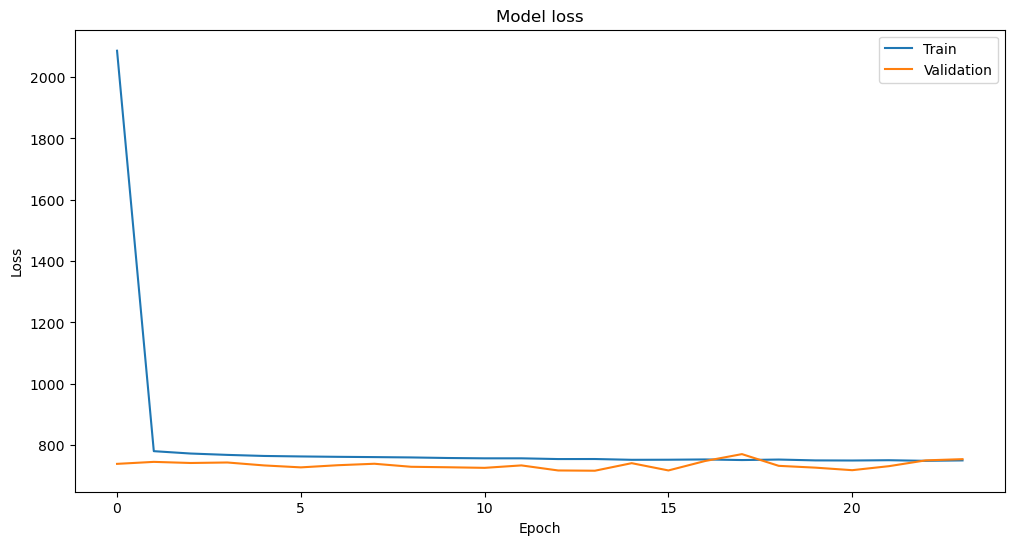

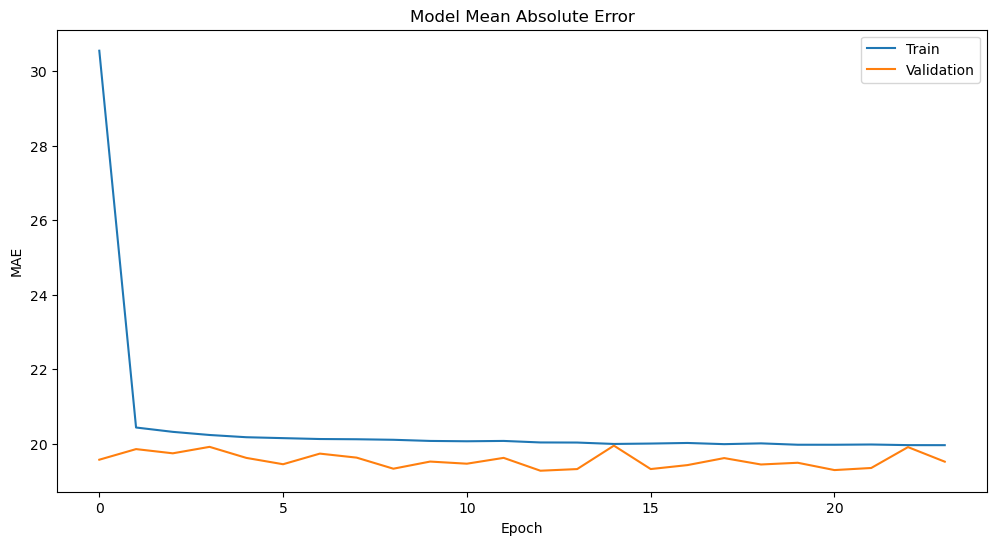

In [9]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation mean absolute error
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
#The mean error (in runs) of the model's predictions on the test data
test_loss, test_mae = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Test MAE: {test_mae}")

Test MAE: 19.54842185974121


In [11]:
#Some example predictions on the test data
predictions = model.predict(X_test_scaled)

df_predictions = pd.DataFrame({
    'Actual': Y_test.iloc[:, 0],
    'Predicted': predictions.flatten()
})
df_predictions.head(20)

,Actual,Predicted
22512,72.0,92.307999
258251,194.0,172.110229
632983,98.0,127.674454
557115,177.0,173.346832
393814,126.0,125.315872
619622,108.0,138.755859
503333,119.0,115.226868
739885,167.0,120.962509
528007,116.0,123.560699
58610,99.0,108.999748


In [12]:
# Save model architecture
model.save('cricket_score_predictor.h5')

#Save scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']